In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from math import sqrt
from sklearn.metrics import mean_squared_error ,mean_absolute_error,explained_variance_score,mean_squared_log_error,r2_score,f1_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import tensorflow as tf

D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Python\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; 

In [4]:
data = pd.read_csv('../Files tcc/data.csv', index_col=0)

In [5]:
data.head()

,Fechamento
Data,
01-01-2015,314.25
02-01-2015,315.03
03-01-2015,281.08
04-01-2015,264.20
05-01-2015,274.47


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text xticklabel objects>)

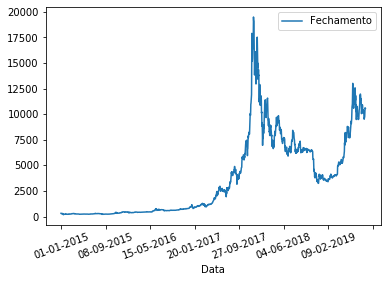

In [32]:
data.plot()
plt.xticks(rotation=20)

In [7]:
df = data[['Fechamento']]
dataset = df.values
dataset = dataset.astype('float32')

In [8]:
coluna = [tf.feature_column.numeric_column('x',shape=[1])]
regressor = tf.estimator.LinearRegressor(feature_columns=coluna)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\danca\\AppData\\Local\\Temp\\tmpz9bjgmsj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000163CC350408>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [10]:
train_size = int(len(dataset)*0.67)
teste_size = len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]
print(len(train), len(test))


1145 564


In [11]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [12]:
def antes(dataset,look_back=1):
    dia_atras = []
    for i in range(len(dataset)-look_back-1):
        dia_atras.append(dataset[i-1+look_back, 0])
    
    return np.array(dia_atras)

In [13]:
look_back=1
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test,look_back=look_back)
dia_atras = antes(test,look_back=look_back)
len(dia_atras)

562

In [14]:
treinamento = tf.estimator.inputs.numpy_input_fn({'x': trainX}, trainY,num_epochs=None,shuffle=True)

In [15]:
teste = tf.estimator.inputs.numpy_input_fn({'x':testX}, testY,num_epochs=1000,shuffle=False)

In [16]:
regressor.train(input_fn=treinamento,steps=10000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\danca\AppData\Local\Temp\tmpz9bjgmsj\model.ckpt.
INFO:tensorflow:loss = 3.0034025, step = 1
INFO:tensorflow:global_step/sec: 799.207
INFO:tensorflow:loss = 0.046113

INFO:tensorflow:loss = 0.06332469, step = 3601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1060.22
INFO:tensorflow:loss = 0.012021942, step = 3701 (0.095 sec)
INFO:tensorflow:global_step/sec: 983.012
INFO:tensorflow:loss = 0.033820175, step = 3801 (0.101 sec)
INFO:tensorflow:global_step/sec: 1012.79
INFO:tensorflow:loss = 0.052882582, step = 3901 (0.100 sec)
INFO:tensorflow:global_step/sec: 1101.84
INFO:tensorflow:loss = 0.023492394, step = 4001 (0.091 sec)
INFO:tensorflow:global_step/sec: 903.318
INFO:tensorflow:loss = 0.022864996, step = 4101 (0.110 sec)
INFO:tensorflow:global_step/sec: 1066.67
INFO:tensorflow:loss = 0.015327439, step = 4201 (0.095 sec)
INFO:tensorflow:global_step/sec: 937.055
INFO:tensorflow:loss = 0.016883362, step = 4301 (0.107 sec)
INFO:tensorflow:global_step/sec: 964.13
INFO:tensorflow:loss = 0.028564634, step = 4401 (0.103 sec)
INFO:tensorflow:global_step/sec: 1114.08
INFO:tensorflow:loss = 0.0067045926, step = 4501 (0.091 sec)
INFO:tensorflow:global_step/sec:

In [17]:
metricas_treinamento = regressor.evaluate(input_fn=treinamento,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-03T16:47:55Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\danca\AppData\Local\Temp\tmpz9bjgmsj\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Evaluation [5000/10000]
INFO:tensorflow:Evaluation [6000/10000]
INFO:tensorflow:Evaluation [7000/10000]
INFO:tensorflow:Evaluation [8000/10000]
INFO:tensorflow:Evaluation [9000/10000]
INFO:tensorflow:Evaluation [10000/10000]
INFO:tensorflow:Finished evaluation at 2020-08-03-16:48:03
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.00021551814, global_step = 

In [18]:
metricas_teste = regressor.evaluate(input_fn=teste,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-03T16:48:04Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\danca\AppData\Local\Temp\tmpz9bjgmsj\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1000/10000]
INFO:tensorflow:Evaluation [2000/10000]
INFO:tensorflow:Evaluation [3000/10000]
INFO:tensorflow:Evaluation [4000/10000]
INFO:tensorflow:Finished evaluation at 2020-08-03-16:48:08
INFO:tensorflow:Saving dict for global step 10000: average_loss = 0.00024557894, global_step = 10000, label/mean = 0.34950018, loss = 0.03143142, prediction/mean = 0.3480552
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\danca\AppData\Local\Temp\tmpz9bjgmsj\model.ckpt-10000


In [19]:
metricas_treinamento

{'average_loss': 0.00021551814,
 'label/mean': 0.096055195,
 'loss': 0.027586322,
 'prediction/mean': 0.094874375,
 'global_step': 10000}

In [20]:
metricas_teste

{'average_loss': 0.00024557894,
 'label/mean': 0.34950018,
 'loss': 0.03143142,
 'prediction/mean': 0.3480552,
 'global_step': 10000}

In [21]:
funcao_previsao = tf.estimator.inputs.numpy_input_fn({'x':test},shuffle=False)

In [22]:
predicao = regressor.predict(input_fn=funcao_previsao)
result = []

In [23]:
for p in regressor.predict(input_fn= funcao_previsao):
    resultado = p['predictions'][0]
    result.append(resultado)
    

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\danca\AppData\Local\Temp\tmpz9bjgmsj\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [24]:
testando = np.asarray(result)

In [25]:
testando = np.reshape(testando,(564,1))
testY = np.reshape(testY,(562,1))
testando = scaler.inverse_transform(testando)
testY = scaler.inverse_transform(testY)

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
resultador = pd.DataFrame(testY,columns=['Esperado'])
resultador['Predito'] = testando[:-2]
resultador.index = data.tail(562).index

Regressao Linear
MAPE: 97.384
Desvio: 2.616
MSE: 91659.000
RMSE: 302.752
MAE: 194.094
MSLE: 0.001
R2 score: 98.366
Explaine Variance Score: 98.380


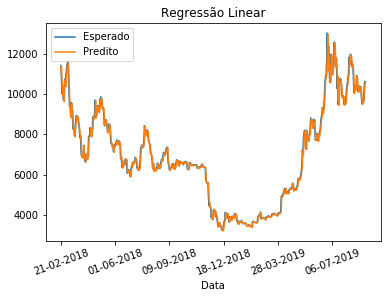

In [28]:
print('Regressao Linear')
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(testY,testando[:-2])))
print("Desvio: %.3f"%mean_absolute_percentage_error(testY,testando[:-2]))
print("MSE: %.3f"%mean_squared_error(testY,testando[:-2]))
print("RMSE: %.3f"%sqrt(mean_squared_error(testY,testando[:-2])))
print("MAE: %.3f"%mean_absolute_error(testY,testando[:-2]))
print("MSLE: %.3f"%mean_squared_log_error(testY,testando[:-2]))
print("R2 score: %.3f"%(r2_score(testY,testando[:-2])*100))
print("Explaine Variance Score: %.3f"%(explained_variance_score(testY,testando[:-2])*100))
resultador.plot()
plt.xticks(rotation=20)
plt.title('Regressão Linear')
plt.savefig('RLI_teste.png')

In [29]:
entrada = np.array([[7463.11,7761.24,7569.63]])
fechamentohoje = [7424.29]

In [30]:
funcao_previsao = tf.estimator.inputs.numpy_input_fn({'x':entrada},shuffle=False)

MAPE: 58.103
Desvio: 41.897
RMSE: 3110.536
Fechamento [7424.29]
Predito [[10534.826]]


Text(0.5, 1.0, 'Comparação do FechamentoXPredição')

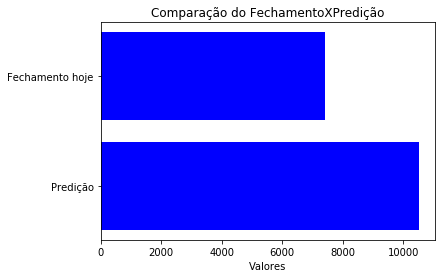

In [33]:
predicaohoje = regressor.predict(input_fn=funcao_previsao)
resultado = p['predictions'][0]
resultado = np.reshape(resultado,(1,1))
resultado = scaler.inverse_transform(resultado)
print("MAPE: %.3f"%(100-mean_absolute_percentage_error(fechamentohoje,resultado)))
print("Desvio: %.3f"%mean_absolute_percentage_error(fechamentohoje,resultado))
print("RMSE: %.3f"%sqrt(mean_squared_error(fechamentohoje,resultado)))
print("Fechamento %s"%fechamentohoje)
print("Predito %s"%resultado)

vetorgrafico = { "Predição": resultado , "Fechamento hoje": fechamentohoje[0]}
colunas = [i for i in vetorgrafico.keys()]
valor = [j for j in vetorgrafico.values()]
popPos = np.arange(len(colunas))
plt.barh(popPos, valor, align='center', color='blue')
plt.yticks(popPos, colunas)
plt.xlabel('Valores')
plt.title('Comparação do FechamentoXPredição')